<a href="https://colab.research.google.com/github/kpatwa153/gis/blob/main/map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [9]:
#! pip install geopandas
!pip install mapclassify
import geopandas as gpd
import mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.3 MB/s eta 0:00:00


## My Area of Interest
The dataset provides the percentage of Obesity across USA state wise. The data is obtained from the 2015 CDC BRFSS Survey. Reason behind the Obesity can later be found out by connecting it with data related to Walkability per state and the population density.

The data is present at data.gov site. Here is the link to view it online: https://catalog.data.gov/dataset/national-obesity-by-state-d765a

Link to download the file: https://data-lakecountyil.opendata.arcgis.com/datasets/lakecountyil::national-obesity-by-state.zip?outSR=%7B%22latestWkid%22%3A3435%2C%22wkid%22%3A102671%7D

## **PS0 Assignment**

In [4]:
#importing the data
! wget -q -O us_map.zip https://drive.google.com/uc?id=1hFpTOmjP-Ti7JAEZfD0V3mRtF5siqS5Q&export=download

zip_ref = zipfile.ZipFile('us_map.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping


In [5]:
#Reading the shapefile data under obs object
obs=gpd.read_file('National_Obesity_By_State.shp')

<Axes: >

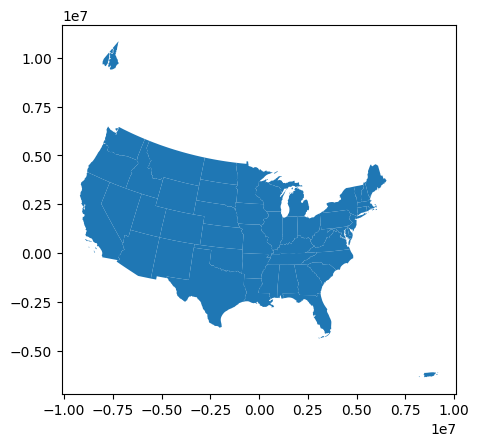

In [6]:
#make the map
obs.plot()

In [7]:
#Finding the data type of all the columns of the dataset
obs.dtypes

FID              int64
NAME            object
Obesity        float64
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

# Exploratory Data Analysis

In [8]:
#Using the describe function
obs.describe()

,FID,Obesity,SHAPE_Leng,SHAPE_Area
count,52.000000,52.000000,5.200000e+01,5.200000e+01
mean,26.500000,29.286538,6.294282e+06,1.724137e+12
std,15.154757,3.832832,3.068681e+06,1.455130e+12
min,1.000000,20.200000,0.000000e+00,0.000000e+00
25%,13.750000,26.250000,5.022132e+06,8.299946e+11
50%,26.500000,29.800000,6.445438e+06,1.492228e+12
75%,39.250000,31.475000,7.747383e+06,2.245753e+12
max,52.000000,36.200000,1.540832e+07,7.672329e+12


In [10]:
df = obs[['NAME','Obesity','SHAPE_Leng']]
df.head(2)

,NAME,Obesity,SHAPE_Leng
0,Texas,32.4,1.540832e+07
1,California,24.2,1.451870e+07


<Axes: >

[]

[]

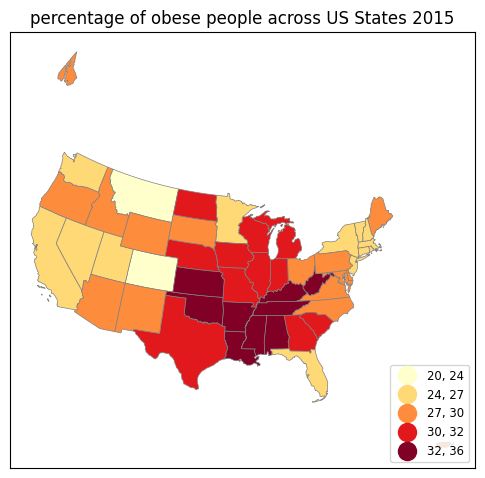

In [12]:
#your first thematic map! :) lets unpack options real quick esp fmt for dec pts; more later under 'bells and whistles'
fig, ax = plt.subplots(1, figsize=(6,10))
obs.plot(ax=ax,column='Obesity',legend=True,cmap='YlOrRd',scheme='natural_breaks',k=5,
         edgecolor='grey',linewidth=0.5,legend_kwds= {"fmt": "{:,.0f}",
        'loc':'lower right','title_fontsize':'medium','fontsize':'small','markerscale':1.4}) #
#leg1 = ax.get_legend()
#leg1.set_title('''Population Density
#2010 (pers/sq mi)''')
ax.title.set_text("percentage of obese people across US States 2015")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
#plt.savefig('fig.pdf',bbox_inches='tight') #,pad_inches=0.1, dpi=200, transparent=True #eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff
#files.download('fig.pdf') #note can also right click fig and save image as